In [1]:
from skimage.metrics import structural_similarity
from PIL import Image
import imutils
import cv2
import requests

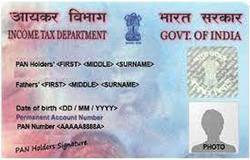

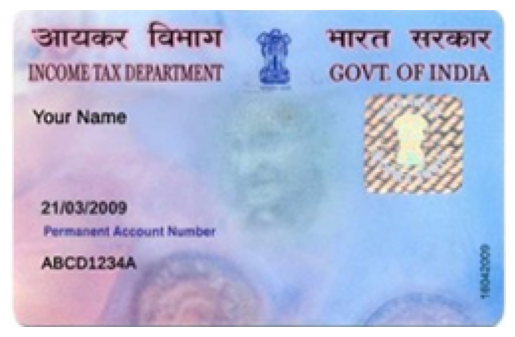

In [13]:
#There are three way to get the image
#1
from google.colab.patches import cv2_imshow
imgO = cv2.imread("/content/original.jpg")
imgT = cv2.imread("/content/tampered.jpg")

#cv2.imshow("image",img)
cv2_imshow(imgO)
#2
img = Image.open("/content/original.jpg")
img.show()
#3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/content/tampered.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [ ]:
#To Get the image from URl we can use Imgae library from PIL like
original = Image.open(requests.get('url', stream = True).raw)

In [3]:
#Resize the image
#1 By using Pillow library
img = Image.open("/content/original.jpg")
# img.show() to show the image
resize= (250,250)
resized = img.resize(resize)
img.save("/content/sample_data.jpg")

In [6]:
#2 By using cv2
resize= (200, 200)
img = cv2.resize(img,resize)
cv2.imwrite("/content/sample_data1.jpg", img)

True

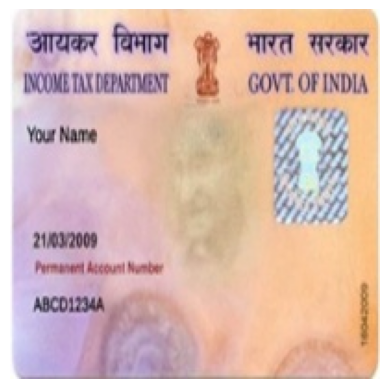

In [7]:
#Print Resized Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/sample_data1.jpg")
plt.imshow(img )
plt.axis("off")
plt.show()

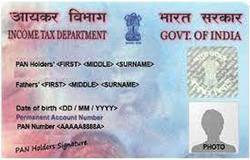

In [11]:
from PIL import Image
imgO = Image.open("/content/original.jpg")
imgT = Image.open("/content/tampered.jpg")

imgO


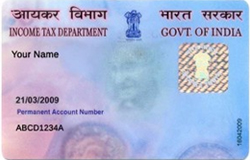

In [9]:
imgT

In [15]:
#Gray=0.299×R+0.587×G+0.114×B
#Converting Image from Colourfull to Gray scale
#Way1--> Using Pillow Library
imgO = imgO.convert("L")
imgT = imgT.convert("L")

#Way2--> Using CV2 Library
imgO1 = cv2.cvtColor(imgO, cv2.COLOR_BGR2GRAY)
imgT1 = cv2.cvtColor(imgT, cv2.COLOR_BGR2GRAY)

array([[252, 252, 251, ..., 251, 254, 254],
       [253, 251, 252, ..., 252, 250, 250],
       [251, 251, 250, ..., 248, 249, 248],
       ...,
       [245, 232, 218, ..., 201, 203, 233],
       [250, 250, 246, ..., 233, 228, 246],
       [244, 247, 251, ..., 252, 251, 253]], dtype=uint8)
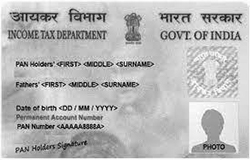

In [16]:
imgO1

array([[254, 254, 254, ..., 253, 252, 254],
       [254, 254, 254, ..., 253, 252, 253],
       [254, 254, 251, ..., 240, 254, 253],
       ...,
       [253, 255, 252, ..., 240, 252, 252],
       [254, 253, 254, ..., 251, 254, 254],
       [255, 254, 254, ..., 253, 252, 252]], dtype=uint8)
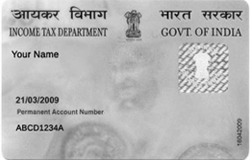

In [17]:
imgT1

In [18]:
#Compute the structural similarity score between the two image for this we have to convert the image into single channel i.e GrayScale.
#Lower the SSIM Score lower the similarity.
(score, diff) = structural_similarity(imgO1, imgT1,  full=True)
diff = (diff * 255).astype('uint8')
print("SSIM: {}".format(score))

SSIM: 0.2952677730856737


array([[238, 222, 202, ...,  74,  79, 105],
       [237, 228, 213, ..., 111, 119, 125],
       [230, 226, 221, ..., 133, 135, 129],
       ...,
       [198, 203, 190, ..., 178, 183, 190],
       [186, 191, 167, ..., 156, 168, 182],
       [163, 188, 167, ..., 140, 152, 161]], dtype=uint8)
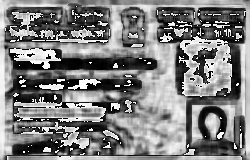

In [19]:

diff

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
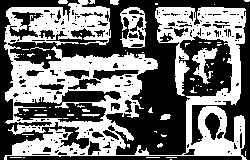

In [23]:
#3 Calculating Threshold Value and Image
thresh = cv2.threshold(diff, 0 , 255,  cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh

In [21]:
thresh = cv2.threshold(diff, 0 , 255,  cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[0]
thresh

119.0

In [24]:
#Calculating Contours and Grab the contours.
cnts =cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [25]:
cnts = imutils.grab_contours(cnts)

In [26]:
cnts

(array([[[170, 159]],
 
        [[171, 159]]], dtype=int32),
 array([[[166, 157]],
 
        [[176, 157]]], dtype=int32),
 array([[[146, 157]],
 
        [[159, 157]]], dtype=int32),
 array([[[ 23, 157]],
 
        [[ 24, 157]]], dtype=int32),
 array([[[ 10, 157]],
 
        [[ 21, 157]]], dtype=int32),
 array([[[245, 151]],
 
        [[245, 155]]], dtype=int32),
 array([[[127, 144]],
 
        [[127, 146]],
 
        [[128, 146]],
 
        [[129, 147]],
 
        [[129, 144]]], dtype=int32),
 array([[[160, 143]],
 
        [[159, 144]],
 
        [[158, 144]],
 
        [[157, 145]],
 
        [[157, 146]],
 
        [[158, 147]],
 
        [[159, 146]],
 
        [[161, 146]],
 
        [[162, 145]],
 
        [[162, 144]],
 
        [[161, 143]]], dtype=int32),
 array([[[198, 139]],
 
        [[199, 139]]], dtype=int32),
 array([[[123, 136]]], dtype=int32),
 array([[[ 26, 136]],
 
        [[ 27, 136]]], dtype=int32),
 array([[[161, 134]],
 
        [[161, 135]],
 
        [[162, 13

In [27]:
#loop over the contour
for c in cnts:
  (x,y,w,h) = cv2.boundingRect(c)
  cv2.rectangle(imgO, (x,y), (x+w ,y+h),(0, 0 ,255), 2)
  cv2.rectangle(imgT, (x,y), (x+w, y+h),(0,0,255), 2)



array([[[254, 252, 252],
        [255, 251, 252],
        [255, 251, 250],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255, 253, 252],
        [253, 251, 250],
        [254, 252, 251],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[253, 251, 250],
        [253, 251, 250],
        [252, 250, 249],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[241, 246, 245],
        [227, 232, 233],
        [211, 217, 222],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [237, 236, 226]],

       [[250, 252, 246],
        [248, 251, 249],
        [242, 246, 247],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [250, 248, 240]],

       [[248, 245, 240],
        [249, 249, 243],
        [251, 252, 248],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [255, 254, 250]]], dtype=uint8)
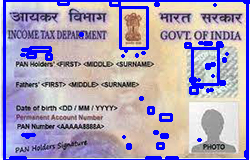

In [29]:
imgO

array([[[254, 253, 255],
        [254, 253, 255],
        [255, 253, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255, 254, 255],
        [254, 253, 255],
        [255, 253, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[255, 253, 255],
        [255, 253, 255],
        [253, 251, 251],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[253, 254, 252],
        [255, 255, 255],
        [252, 250, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [254, 253, 249]],

       [[254, 255, 253],
        [253, 253, 253],
        [254, 254, 254],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [254, 255, 253]],

       [[255, 255, 254],
        [254, 255, 253],
        [254, 255, 251],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [250, 252, 252]]], dtype=uint8)
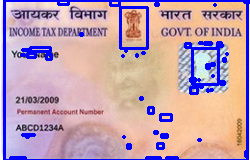

In [30]:
imgT

array([[238, 222, 202, ...,  74,  79, 105],
       [237, 228, 213, ..., 111, 119, 125],
       [230, 226, 221, ..., 133, 135, 129],
       ...,
       [198, 203, 190, ..., 178, 183, 190],
       [186, 191, 167, ..., 156, 168, 182],
       [163, 188, 167, ..., 140, 152, 161]], dtype=uint8)
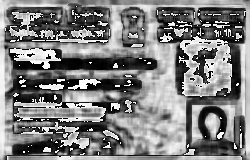

In [32]:
# Display Difference image with Black
diff

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
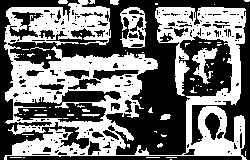

In [34]:
#Display Thresh Image with white.
thresh